***
**Disclaimer**: This notebook is lenghty, <u>navigate the links given below, if need be</u>.

- [Linear](#linear)
- [Sigmoid](#sigmoid)
- [Tanh](#tanh)
- [SoftMax](#softmax)
- [ReLU](#relu)
- [Leaky ReLU](#leaky_relu)
- [ELU](#elu)
- [PReLU](#prelu)
- [GELU](#gelu)
***

## <a id="linear"></a>Linear

##### Overview:

The linear activation function, also known as the *identity function*, returns the input as is *without any non-linear transformation*. It is typically used in regression models or when a neural network needs to output a continuous value.

**NOTE**: Linear activation <span style="font-size: 11pt; color: pink; font-weight: normal">**lacks non-linearity**</span>, limiting the representational power of the Neural Network. It <u>cannot model complex relationships</u> between inputs and outputs.

##### Formula:

$$\text{linear}(x) = x$$

##### Code
```python
def linear(x):
    return x
```

## <a id="sigmoid"></a>Sigmoid:

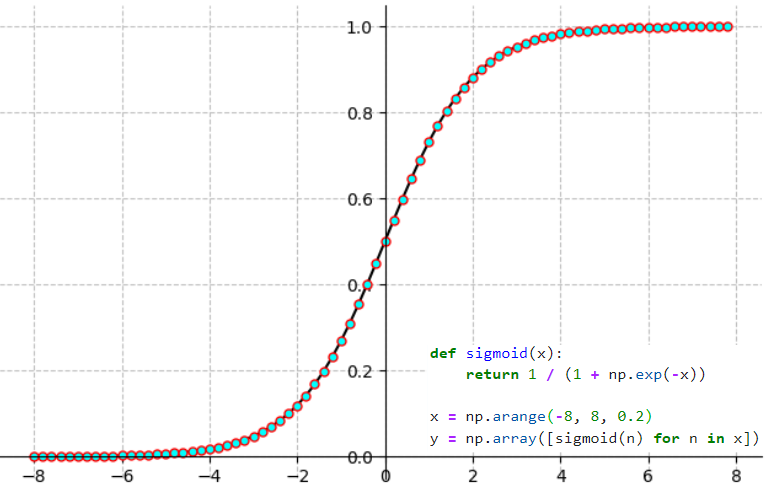 
 

The sigmoid function maps the input to a range between 0 and 1, making it <u>suitable for binary classification problems</u> or as the output activation in multi-class classification.

Sigmoid "squashes" the input to the range (0, 1) using the *logistic function*.

**NOTE**: Sigmoid suffers from the <span style="font-size: 11pt; color: pink; font-weight: normal">**vanishing gradient**</span> problem, where gradients become close to zero, and saturation for large inputs, making it challenging to train deep neural networks.

**Formula**

$$\text{sigmoid}(x) = \frac{1}{1 + \exp^{(-x)}}$$

**Code**

```python
# TensorFlow
import tensorflow as tf
tf.sigmoid(x)

# PyTorch
import torch
torch.sigmoid(x)

# NumPy implementation:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```
    
## <a id="tanh"></a>Tanh (Hyperbolic Tangent):
The hyperbolic tangent function, $tanh$, maps the input to a range between -1 and 1. It is <u>commonly used in the hidden layers of neural networks</u>.
    
Tanh is an S-shaped function that squashes the input to the range (-1, 1).

Tanh helps in capturing negative correlations in the data. It is zero-centered, making it useful in the hidden layers of neural networks
    
Tanh is often used as an activation function in recurrent neural networks (RNNs), autoencoders, and models where negative correlations in the data are important.
    
**NOTE**: Tanh shares some drawbacks with sigmoid, such as the <span style="font-size: 11pt; color: pink; font-weight: normal">**vanishing gradient**</span> problem and <span style="font-size: 11pt; color: pink; font-weight: normal">**saturation for large inputs**</span>. It is prone to gradients close to zero in the saturated regions, slowing down training


**Formula**

$$\text{tanh}(x) = \frac{{\exp(x) - \exp(-x)}}{{\exp(x) + \exp(-x)}}$$

**Code**

```python
# TensorFlow
import tensorflow as tf

tf.nn.tanh(x)

# PyTorch
import torch

torch.tanh(x)

# NumPy
import numpy as np

np.tanh(x)
```
    
## <a id="softmax"></a>SoftMax:
    
Softmax is <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**commonly used in the final (output) layer for multi-class classification**</span>. It normalizes the outputs into a probability distribution that sums up to 1, enabling class predictions. 
    
Softmax computes the exponential of each input element and *normalizes* them to obtain a **probability distribution**. <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**It provides a clear interpretation of the model's confidence in each class prediction**</span>.
    
**NOTE**: Softmax is <span style="font-size: 11pt; color: rgb(255, 200, 79); font-weight: normal">**sensitive to outliers**</span> and can amplify the differences between input values, potentially leading to numerical instability. It does not handle class imbalance well.

**Formula**
$$\text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j=1}^{K}\exp(x_j)}$$  

for $i = 1, 2, \ldots, K$, where $K$ is the number of classes.
    
**Code**
```python
# TensorFlow:
import tensorflow as tf

tf.nn.softmax(x)

# PyTorch:
import torch

torch.nn.functional.softmax(x, dim=1)

# NumPy implementation:
import numpy as np

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)
```
    
## <a id="relu"></a>ReLU (Rectified Linear Unit):
    
ReLU returns the input as is if it is positive, and 0 otherwise. ReLU is <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**widely used as the activation function in hidden layers of deep neural networks**</span>, especially in convolutional neural networks (CNNs)
    
ReLU is <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**computationally efficient**</span>, as it only involves simple thresholding operations. It <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**overcomes the vanishing gradient problem**</span> and accelerates convergence in deep neural networks. It has been successful in training deep architectures and <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**achieves good generalization**</span>.
    
**NOTE**: ReLU can suffer from the <span style="font-size: 11pt; color: pink; font-weight: normal">**"dying ReLU"**</span> problem, <u>where neurons become permanently inactive if their output falls below zero</u>. It can cause dead neurons and a significant number of zero-valued gradients during backpropagation.

**Formula**
$$\text{ReLU}(x) = \max(0, x)$$

**Code**
```python
# TensorFlow:
import tensorflow as tf

tf.nn.relu(x)

# PyTorch:
import torch

torch.relu(x)

# NumPy implementation:
import numpy as np

def relu(x):
    return np.maximum(0, x)
```

## <a id="leaky_relu"></a>Leaky ReLU:
    
Leaky ReLU is a variation of ReLU that introduces a small slope for negative values, <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**addressing the "dying ReLU" problem**</span> where neurons become inactive during training, thus allowing gradients to flow. It helps prevent dead neurons and can improve model performance compared to standard ReLU
    
Leaky ReLU is used as an alternative to ReLU, especially in models where the "dying ReLU" problem is prevalent. It can be beneficial in scenarios where standard ReLU fails to provide satisfactory results.

**NOTE**: Leaky ReLU <span style="font-size: 11pt; color: rgb(255, 200, 79); font-weight: normal">**introduces additional hyperparameters**</span>, making it more complex to tune. The choice of the <u>slope parameter can affect the model's performance</u>.
    
Leaky ReLU sets positive values unchanged and negative values with a small slope, typically a small fraction like 0.01

**Formula**
$$\text{LeakyReLU}(x) = \begin{cases} x, & \text{if } x \geq 0 \\ \alpha \cdot x, & \text{if } x < 0 \end{cases}$$

**Code**
```python
# TensorFlow:
import tensorflow as tf

tf.nn.leaky_relu(x, alpha)

#PyTorch:
import torch

torch.nn.functional.leaky_relu(x, negative_slope=alpha)

#NumPy implementation:
import numpy as np

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)
```


    
## <a id="elu"></a>ELU (Exponential Linear Units):
    
ELU is an activation function that <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**addresses the vanishing gradient problem while allowing negative values**</span>. It provides smooth outputs for negative values and encourages the network to have mean activations close to zero.   
    
**NOTE**: ELU <span style="font-size: 11pt; color: rgb(255, 200, 79); font-weight: normal">**introduces additional computation**</span> due to the exponential function, which can slightly slow down the training processand an <span style="font-size: 11pt; color: rgb(255, 200, 79); font-weight: normal">**introduces additional hyperparameter**</span> which has to be tuned.   
    
ELU is similar to ReLU for positive values but uses an exponential function for negative values, controlled by the parameter $\alpha$.

**Formula**

$$\text{ELU}(x) = \begin{cases} x, & \text{if } x \geq 0 \\
\alpha \cdot (\exp(x) - 1), & \text{if } x < 0 \end{cases}$$

**Code**
```python
# TensorFlow:
import tensorflow as tf

tf.nn.elu(x)

# PyTorch:
import torch

torch.nn.functional.elu(x, alpha=alpha)

# NumPy implementation:
import numpy as np

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))
```

## <a id="prelu"></a>PReLU (Parametric Rectified Linear Units):
    
PReLU is an extension of ReLU that introduces a **<u>learnable</u>** parameter $\alpha$ for the negative slope. It provides <span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**flexibility and adaptability**</span> to the data during training, potentially improving model performance.

PReLU is useful in scenarios where ReLU fails to capture the non-linear relationships in the data. It has been applied to various deep learning models, including CNNs and neural machine translation.    
    
**NOTE**: PReLU increases the model's complexity due to the additional learnable parameter. It <span style="font-size: 11pt; color: rgb(255, 200, 79); font-weight: normal">**requires careful initialization and can be prone to overfitting**</span>.

**Formula**
$$\text{PReLU}(x) = \begin{cases} x, & \text{if } x \geq 0 \\ \alpha \cdot x, & \text{if } x < 0 \end{cases}$$

**Code**
```python
import numpy as np

# While main body of function remains the same ...
def prelu(x, alpha=0.01):
    return np.maximum(0.0, x) + alpha * np.minimum(0.0, x)

# Implementation of learnable parameter << ALPHA >> for PReLU,
# Unfortunately, is out of the scope of this work
```

## <a id="gelu"></a>GELU (Gaussian Error Linear Units):
    
GELU is an activation function that <u>approximates the cumulative distribution function</u> (CDF) of a Gaussian distribution.

<span style="font-size: 11pt; color: rgb(144, 200, 144); font-weight: normal">**GELU has been particularly successful in transformer-based architectures, such as the Transformer models for machine translation, language understanding, and other natural language processing tasks**</span>. 

It has shown improved performance compared to traditional activation functions like ReLU in such scenarios.
    
GELU smoothly saturates positive and negative values using a **Gaussian cumulative distribution approximation**.

**Formula**
$$\text{GELU}(x) = 0.5 \cdot \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)$$


**ERF**: The erf (error function) is a special function that cannot be expressed in terms of elementary functions like polynomials, exponentials, or trigonometric functions. It is commonly denoted as $\text{erf}(x)$ and is defined as follows:

$$ \text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt $$

The error function is an odd function, symmetric around the origin, with a range from -1 to 1. It is primarily used in statistics and probability calculations involving normal distributions, such as calculating cumulative probabilities, quantiles, or the complementary error function (erfc).

In GELU activation function, the erf function is used to approximate the cumulative distribution function (CDF) of a Gaussian distribution, allowing GELU to provide a smooth non-linear behavior.   

**Code**
```python
# Unfortunately, due to it's complexity,
# implementation of GELU is out of the scope of this work
```